# Earthquake prediction

<img src="images.jpg" height=50px width=400px></img>

# Problem Statement:

A system capable of predicting earthquake must predict about its exact location, specific magnitude range and precise time span of occurrence and probability of occurrence .
 Prediction has been made on the basis of mathematically calculated eight seismic indicators using the earthquake catalogue of the region. These parameters are based on the well-known geophysical facts of Gutenberg–Richter’s inverse law, distribution of characteristic earthquake magnitudes and seismic quiescence.



## Implementation

In [0]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import missingno as ms
%matplotlib inline

In [0]:
data = pd.read_csv('Earthquake_data.csv')

In [0]:
data.head(3)

,time,latitude,longitude,depth,mag,magType,nst,gap,dmin,rms,...,updated,place,type,horizontalError,depthError,magError,magNst,status,locationSource,magSource
0,2018-07-22T20:39:06.910Z,19.390833,-155.264328,-0.71,2.37,md,16.0,103.0,0.007544,0.34,...,2018-07-22T20:42:14.430Z,"5km SSW of Volcano, Hawaii",earthquake,0.34,0.38,0.39,7.0,automatic,hv,hv
1,2018-07-22T20:38:56.460Z,19.424166,-155.255005,0.37,2.43,ml,13.0,146.0,0.005713,0.10,...,2018-07-22T20:44:36.870Z,"1km WSW of Volcano, Hawaii",earthquake,0.22,0.15,0.42,19.0,automatic,hv,hv
2,2018-07-22T20:38:48.240Z,19.398666,-155.290161,0.79,2.40,ml,11.0,76.0,0.012210,0.17,...,2018-07-22T20:44:27.480Z,"6km WSW of Volcano, Hawaii",earthquake,0.51,0.43,0.42,22.0,automatic,hv,hv


In [0]:
data.tail(3)

,time,latitude,longitude,depth,mag,magType,nst,gap,dmin,rms,...,updated,place,type,horizontalError,depthError,magError,magNst,status,locationSource,magSource
5476,2018-07-15T20:52:42.080Z,19.395001,-155.286835,0.90,2.25,ml,21.0,48.0,0.008390,0.14,...,2018-07-15T22:38:00.200Z,"6km SW of Volcano, Hawaii",earthquake,0.20,0.24,0.33,16.0,automatic,hv,hv
5477,2018-07-15T20:48:16.130Z,19.415667,-155.265335,0.35,2.30,ml,19.0,74.0,0.006262,0.31,...,2018-07-15T20:53:57.890Z,"3km WSW of Volcano, Hawaii",earthquake,0.28,0.24,0.28,15.0,automatic,hv,hv
5478,2018-07-15T20:47:55.280Z,19.415501,-155.296661,0.81,2.29,ml,14.0,156.0,0.007521,0.13,...,2018-07-15T20:53:37.590Z,"6km WSW of Volcano, Hawaii",earthquake,0.31,0.22,0.37,14.0,automatic,hv,hv


In [0]:
type(data)

pandas.core.frame.DataFrame

In [0]:
data.shape

(5479, 22)

In [0]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5479 entries, 0 to 5478
Data columns (total 22 columns):
time               5479 non-null object
latitude           5479 non-null float64
longitude          5479 non-null float64
depth              5479 non-null float64
mag                5479 non-null float64
magType            5479 non-null object
nst                4875 non-null float64
gap                5028 non-null float64
dmin               5027 non-null float64
rms                5479 non-null float64
net                5479 non-null object
id                 5479 non-null object
updated            5479 non-null object
place              5479 non-null object
type               5479 non-null object
horizontalError    4981 non-null float64
depthError         5479 non-null float64
magError           5013 non-null float64
magNst             5024 non-null float64
status             5479 non-null object
locationSource     5479 non-null object
magSource          5479 non-null object
d

In [0]:
data.describe()

,latitude,longitude,depth,mag,nst,gap,dmin,rms,horizontalError,depthError,magError,magNst
count,5479.000000,5479.000000,5479.000000,5479.000000,4875.000000,5028.000000,5027.000000,5479.000000,4981.000000,5479.000000,5013.000000,5024.000000
mean,24.145829,-147.086426,6.558106,2.312119,20.886154,89.912665,0.108372,0.235240,0.645904,0.893382,0.684618,16.473527
std,13.046497,33.293635,24.190602,0.638113,11.010084,59.753048,0.883814,0.168817,1.533695,2.973400,0.903529,20.811816
min,-61.394800,-179.702900,-3.390000,0.950000,2.000000,11.000000,0.000140,0.010000,0.100000,0.000000,0.000000,1.000000
25%,19.401167,-155.281006,0.350000,1.940000,13.000000,47.750000,0.004684,0.140000,0.220000,0.200000,0.240000,9.000000
50%,19.412500,-155.271668,0.870000,2.300000,19.000000,69.000000,0.007603,0.190000,0.280000,0.280000,0.330000,13.000000
75%,19.427000,-155.258667,1.820000,2.650000,26.000000,114.000000,0.011615,0.270000,0.440000,0.480000,0.440000,19.000000
max,86.878700,179.827100,587.800000,6.000000,163.000000,355.000000,28.613000,1.440000,28.530000,31.610000,6.080000,580.000000


C:\Users\sravani\Anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "
C:\Users\sravani\Anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


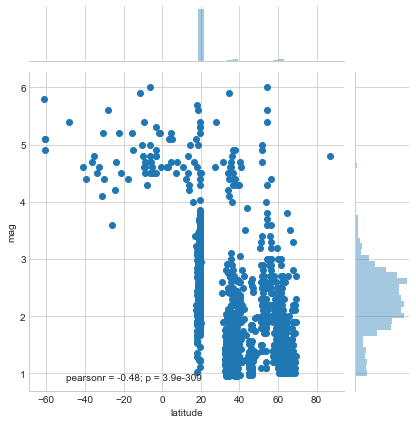

In [0]:
sns.jointplot(x='latitude',y='mag',data=data)

C:\Users\sravani\Anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


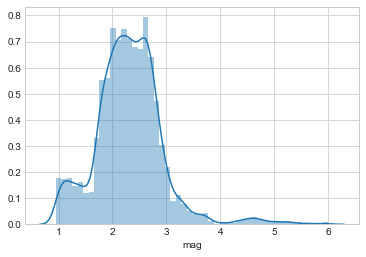

In [0]:
sns.distplot(data['mag'])

In [0]:
data.corr()

,latitude,longitude,depth,mag,nst,gap,dmin,rms,horizontalError,depthError,magError,magNst
latitude,1.000000,-0.001965,0.302715,-0.476818,0.100494,0.062481,-0.274201,0.375391,-0.167905,0.082885,-0.105573,-0.019413
longitude,-0.001965,1.000000,0.231813,0.285003,0.015078,0.109008,0.485475,0.398452,0.562187,0.270060,-0.149541,0.353530
depth,0.302715,0.231813,1.000000,0.049253,-0.060742,0.115569,0.260139,0.371633,0.471124,0.182430,-0.080094,0.275347
mag,-0.476818,0.285003,0.049253,1.000000,0.301595,-0.133583,0.364316,0.279134,0.415563,0.046477,0.299769,0.458680
nst,0.100494,0.015078,-0.060742,0.301595,1.000000,-0.576666,-0.103923,0.264362,-0.234943,-0.123223,0.382578,0.731321
gap,0.062481,0.109008,0.115569,-0.133583,-0.576666,1.000000,0.072931,-0.000692,0.369460,0.269038,-0.181164,-0.168415
dmin,-0.274201,0.485475,0.260139,0.364316,-0.103923,0.072931,1.000000,0.437725,0.565002,0.141085,-0.072210,0.290103
rms,0.375391,0.398452,0.371633,0.279134,0.264362,-0.000692,0.437725,1.000000,0.597761,0.171041,0.070718,0.448153
horizontalError,-0.167905,0.562187,0.471124,0.415563,-0.234943,0.369460,0.565002,0.597761,1.000000,0.415713,-0.102870,0.332708
depthError,0.082885,0.270060,0.182430,0.046477,-0.123223,0.269038,0.141085,0.171041,0.415713,1.000000,-0.083868,0.081225


Text(0.5,1,'data.corr()')

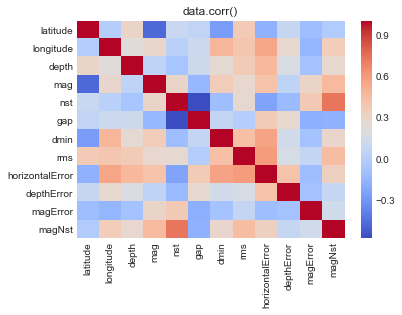

In [0]:
sns.heatmap(data.corr(),cmap='coolwarm',xticklabels=True)
plt.title('data.corr()')

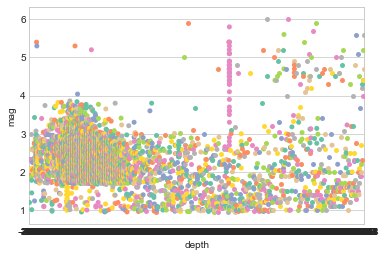

In [0]:
sns.swarmplot
sns.swarmplot(x='depth',y='mag',data=data,palette='Set2')

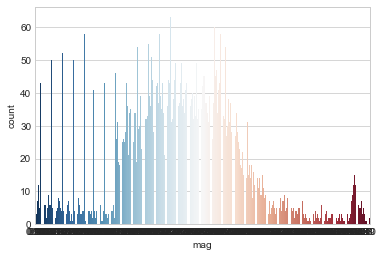

In [0]:
sns.set_style('whitegrid')
sns.countplot(x='mag',data=data,palette='RdBu_r')

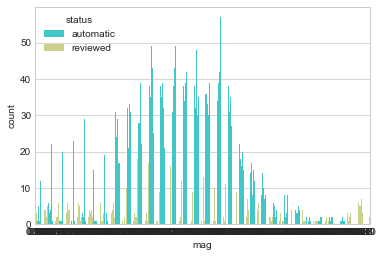

In [0]:
sns.set_style('whitegrid')
sns.countplot(x='mag',hue='status',data = data,palette='rainbow')

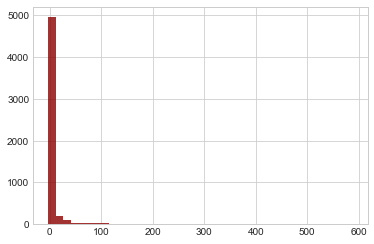

In [0]:
data['depth'].hist(bins = 40, color = 'darkred', alpha = 0.8)

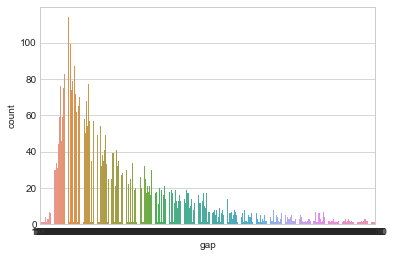

In [0]:
sns.countplot(x = 'gap', data = data)

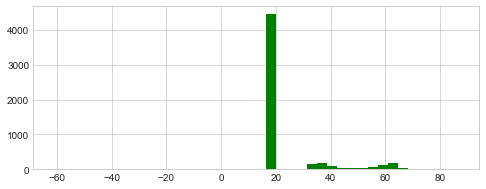

In [0]:
data['latitude'].hist(color = 'green', bins = 40, figsize = (8,3))

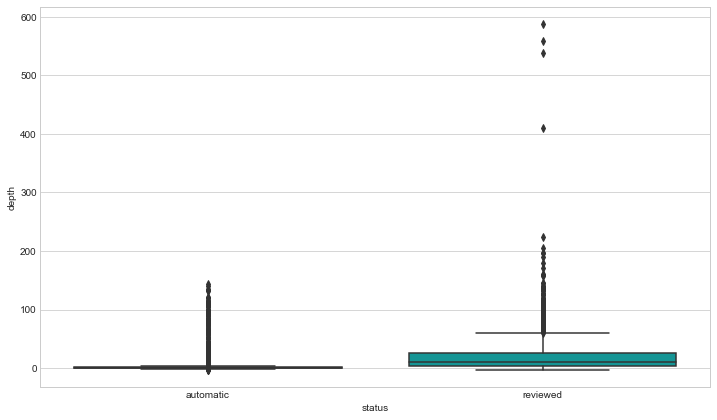

In [0]:
plt.figure(figsize=(12, 7))
sns.boxplot(x='status',y='depth',data=data,palette='winter')

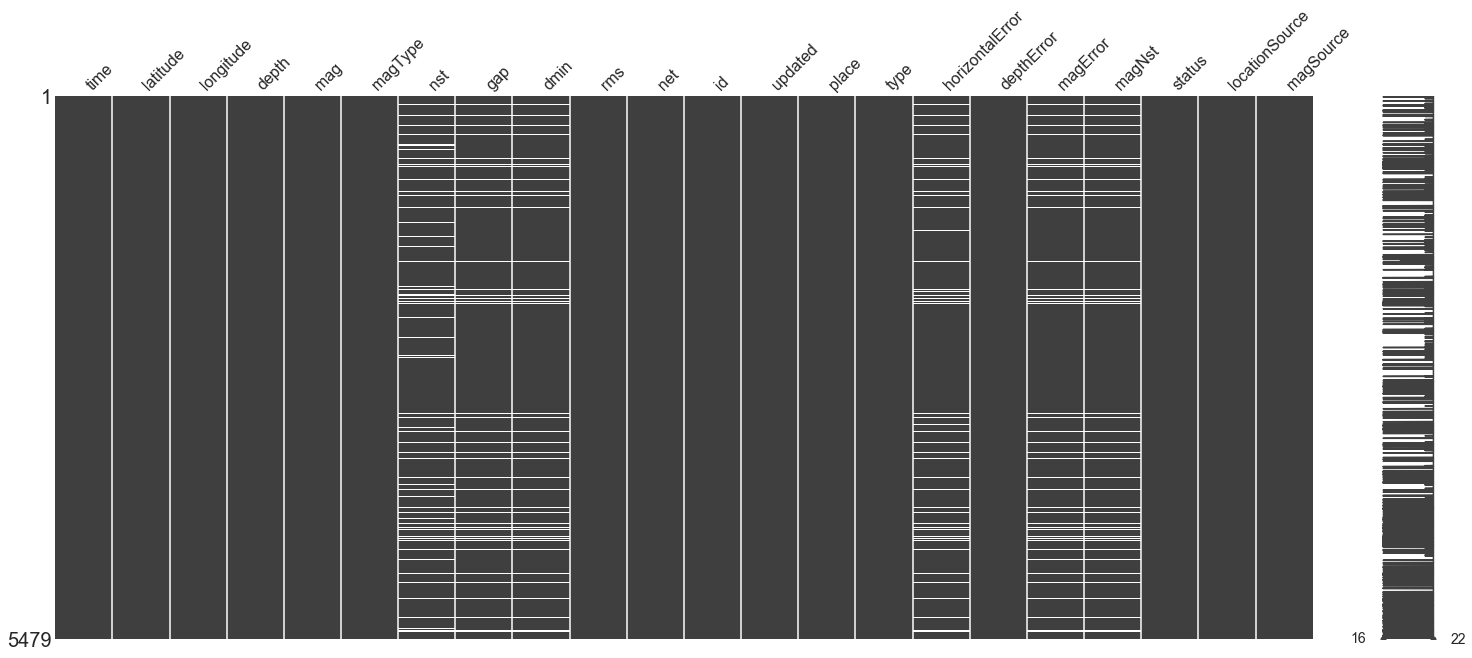

In [0]:
ms.matrix(data)

In [0]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5479 entries, 0 to 5478
Data columns (total 22 columns):
time               5479 non-null object
latitude           5479 non-null float64
longitude          5479 non-null float64
depth              5479 non-null float64
mag                5479 non-null float64
magType            5479 non-null object
nst                4875 non-null float64
gap                5028 non-null float64
dmin               5027 non-null float64
rms                5479 non-null float64
net                5479 non-null object
id                 5479 non-null object
updated            5479 non-null object
place              5479 non-null object
type               5479 non-null object
horizontalError    4981 non-null float64
depthError         5479 non-null float64
magError           5013 non-null float64
magNst             5024 non-null float64
status             5479 non-null object
locationSource     5479 non-null object
magSource          5479 non-null object
d

In [0]:
data.drop('net', axis = 1,inplace=True)

In [0]:
data.drop('magType', axis = 1,inplace=True)

In [0]:
data.drop('magSource', axis = 1,inplace=True)

In [0]:
data.drop('locationSource', axis = 1,inplace=True)

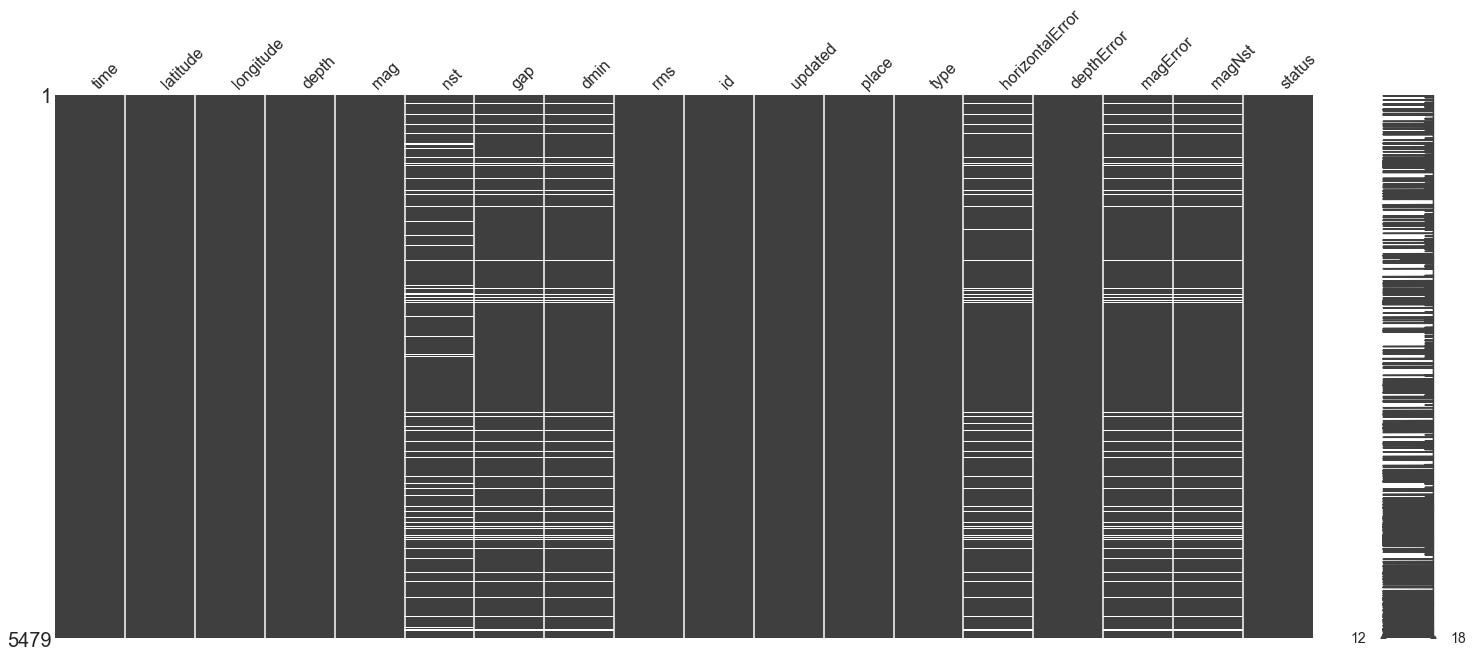

In [0]:
ms.matrix(data)

In [0]:
data.drop('horizontalError', axis = 1,inplace=True)

In [0]:
data.drop('status', axis = 1,inplace=True)

In [0]:
data.drop('type', axis = 1,inplace=True)

In [0]:
data.drop('place', axis = 1,inplace=True)

In [0]:
data.drop('id', axis = 1,inplace=True)

In [0]:
data.drop('time', axis = 1,inplace=True)

In [0]:
data.drop('updated', axis = 1,inplace=True)

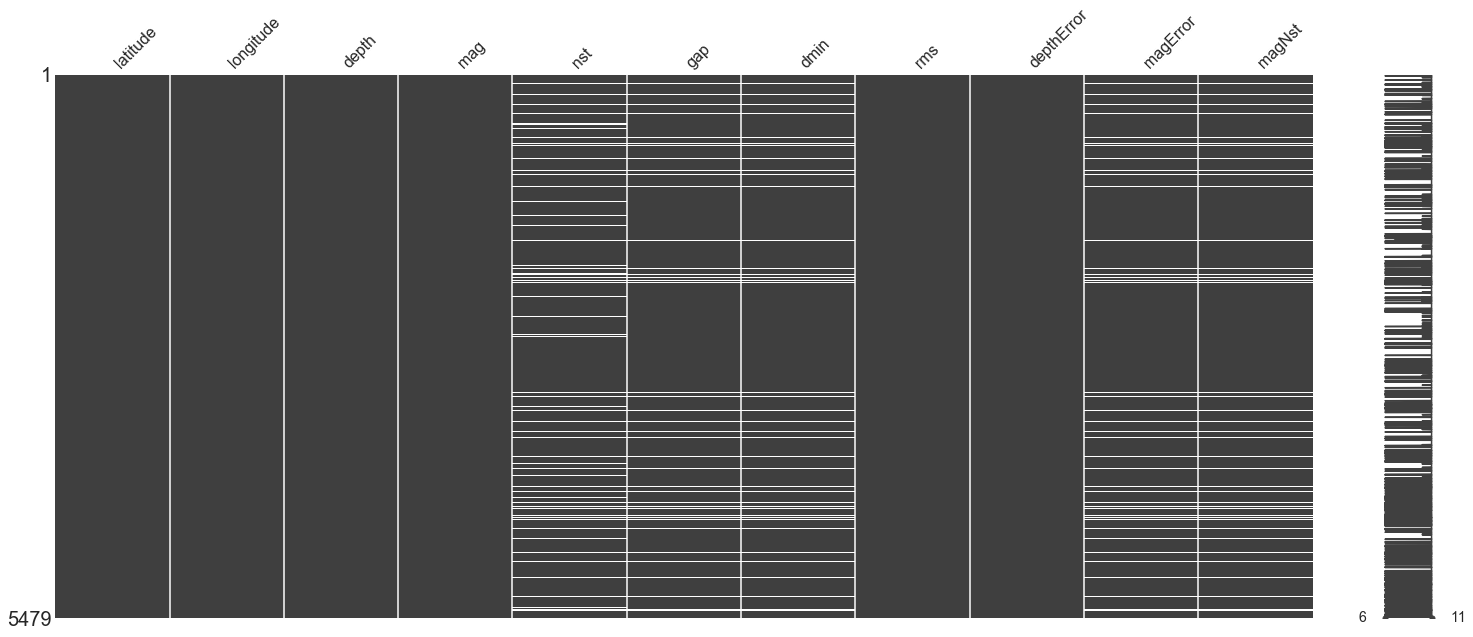

In [0]:
ms.matrix(data)

In [0]:
data.fillna(data['nst'].mean(),inplace=True)

In [0]:
data.fillna(data['gap'].mean(),inplace=True)

In [0]:
data.fillna(data['dmin'].mean(),inplace=True)

In [0]:
data.fillna(data['magError'].mean(),inplace=True)

In [0]:
data.fillna(data['magNst'].mean(),inplace=True)

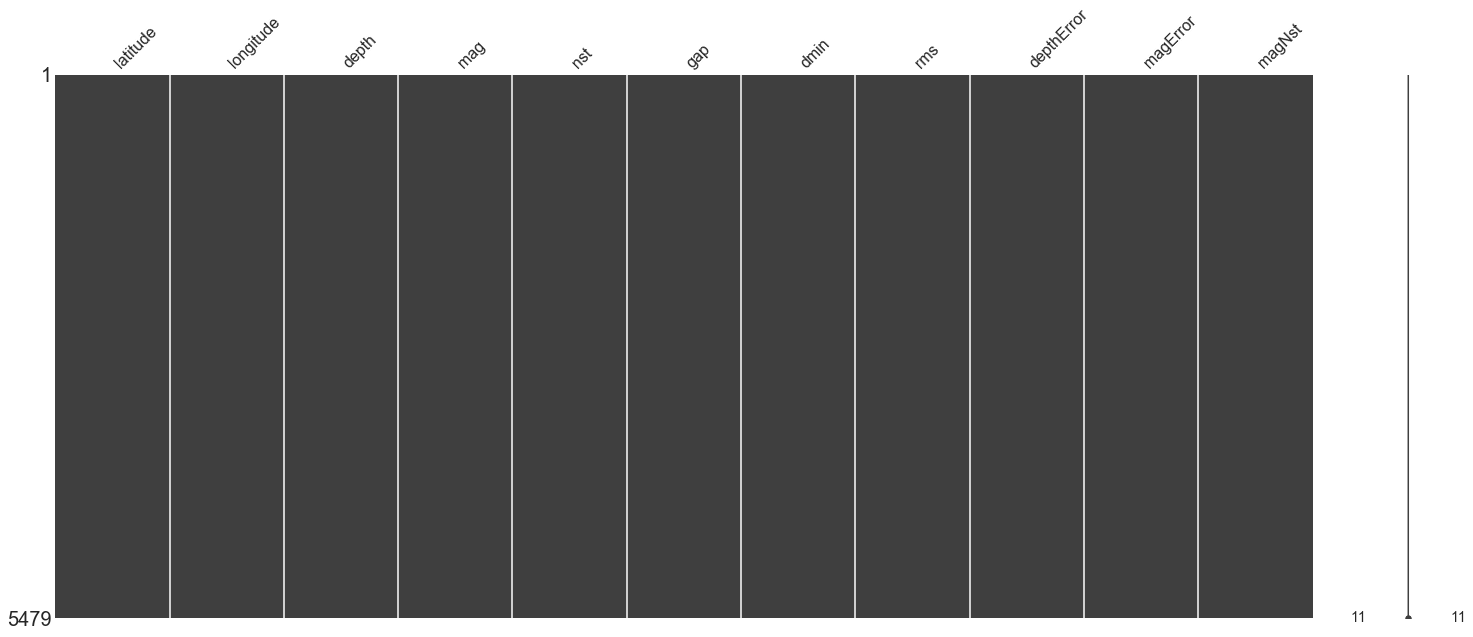

In [0]:
ms.matrix(data)

In [0]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5479 entries, 0 to 5478
Data columns (total 11 columns):
latitude      5479 non-null float64
longitude     5479 non-null float64
depth         5479 non-null float64
mag           5479 non-null float64
nst           5479 non-null float64
gap           5479 non-null float64
dmin          5479 non-null float64
rms           5479 non-null float64
depthError    5479 non-null float64
magError      5479 non-null float64
magNst        5479 non-null float64
dtypes: float64(11)
memory usage: 470.9 KB


In [0]:
#from sklearn.model_selection import train_test_split

#X_train, X_test, y_train, y_test = train_test_split(data.drop('mag',axis=1), 
                                                   # data['mag'], test_size=0.25, 
                                                    #random_state=160)
    

In [0]:
feature_cols=['latitude','longitude','depth','nst','gap','dmin']
X=data[feature_cols]
y=data['mag']

In [0]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.25,random_state=160)
    

In [0]:
X_train.shape

(4109, 6)

In [0]:
X_test.shape

(1370, 6)

In [0]:
y_train.size

4109

In [0]:
y_test.size

1370

In [0]:
#y_pred=regressor.predict(X_test)

In [0]:
#y_pred

In [0]:
from sklearn import svm
clf=svm.SVR(kernel='rbf',max_iter=20)
clf.fit(X_train,y_train)


C:\Users\sravani\Anaconda3\lib\site-packages\sklearn\svm\base.py:218: ConvergenceWarning: Solver terminated early (max_iter=20).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  % self.max_iter, ConvergenceWarning)


SVR(C=1.0, cache_size=200, coef0=0.0, degree=3, epsilon=0.1, gamma='auto',
  kernel='rbf', max_iter=20, shrinking=True, tol=0.001, verbose=False)

In [0]:
y_pred=clf.predict(X_test)

In [0]:
y_pred

array([3.04      , 3.04000041, 3.04      , ..., 3.04      , 3.04      ,
       3.04002407])

In [0]:
y_pred.size

1370

In [0]:
y_test.size

1370

In [0]:
from sklearn import metrics
print(metrics.mean_absolute_error(y_test,y_pred))
print(metrics.mean_squared_error(y_test,y_pred))
print(np.sqrt(metrics.mean_squared_error(y_test,y_pred)))


0.8269365636428929
0.9264896773893185
0.9625433379278663
